<h2 align="center">Recurrent neural network exploration</h2> 

In [1]:
# Imports
import math as m
import numpy as np
import matplotlib.pyplot as plt
import holoviews as hv
import pylab as pl
from pylab import exp,cos,sin,pi,tan, pi
import pandas as pd
import seaborn as sb
import holoviews as hv
from IPython.display import SVG
import io
from PIL import Image
from random import random
import elastica as el
import elastica_neurons as en
from dynamics import *
%matplotlib inline
hv.notebook_extension()

/usr/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


First we explore a simple network with only one neuron. The neuron receives a certain excitation ($in$). The speed with which the neuron changes it's response, depends on the contant $\tau_{syn}$ (the smaller $\tau_{syn}$, the slower the change). We setup the simple recurrent neural network below.

$\tau_{syn}\frac{dr(t)}{dt}=-r(t)+in$

So every time step the change in the rate of the neuron is:

$\frac{dr(t)}{dt}=\cfrac{-r(t)+in}{\tau_{syn}}$

Go in more details and show the first few steps of calculations of $\frac{dr(t)}{dt}$. $\tau_{syn}$ changes how fast the neuron goes to the stable state.

In [30]:
len(nosn)

6

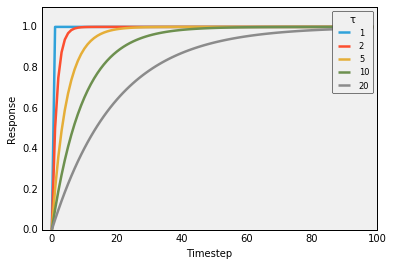

In [65]:
nosn = [1,2,5,10,20]
setNumberOfColors(len(nosn))
for k in range(len(nosn)):
    tau = nosn[k]
    r = np.zeros(100)
    inp = 1
    drdt = 0
    for i in range(99):
        drdt = (-r[i] + inp)/tau
        r[i+1] = r[i] + drdt
    plt.plot(r, label=tau)
plt.legend(title='τ'.decode('utf-8'))
plt.xlabel('Timestep')
plt.ylabel('Response')
plt.ylim([0,1.1])
plt.xlim([-3,100])
plt.savefig('../Report/Pictures/experiments/rnn/simple.png', dpi=200,bbox_inches='tight')


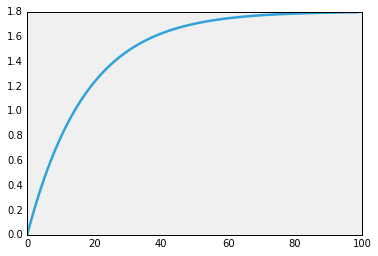

In [3]:
tau = 20
r1 = np.zeros(100)
r2 = np.zeros(100)
inp1 = 2
inp2 = 2
drdt1 = 0
drdt2 = 0
for i in range(99):
    drdt1 = (-r1[i] + inp1)/tau
    r1[i+1] = r1[i] + drdt1
    drdt2 = (-r2[i] + inp2 - 0.1*r1[i])/tau
    r2[i+1] = r2[i] + drdt2
plt.plot(r2)